In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["font.size"] = 20
plt.rcParams["legend.fontsize"] = 13

NUM_ROBOTS = 5

dfs = []
for i in range(NUM_ROBOTS):
    df = pd.read_csv(os.path.join('ROS2', "das", f'robot_{i}_data.csv'))
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [33]:
df.columns

Index(['robot_id', 'iteration', 'position', 'target', 'sigma_est', 'grad_est',
       'grad_z', 'grad_sigma_z', 'local_cost'],
      dtype='object')

In [34]:
# Parse position columns, not it is in format "[a,b,c]"
for col in df.columns[2:]:
    if col == "local_cost":
        continue
    df[col] = df[col].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))

In [35]:
def plot(df, col, sum_over_robots=False, plot_single_robots=True):
    robots_values = []
    for i in range(NUM_ROBOTS):
        robot_df = df[df['robot_id'] == i]
        values = [np.linalg.norm(val) if isinstance(val, np.ndarray) else val for val in robot_df[col].to_numpy()]        
        if sum_over_robots:
            robots_values.append(values)
        if plot_single_robots:
            plt.plot(robot_df['iteration'].to_numpy(), values, label=f'Robot {i}', linewidth=1.5, alpha=0.7, linestyle='--')
    
    if sum_over_robots:
        summed_values = np.sum(np.array(robots_values), axis=0)
        plt.plot(robot_df['iteration'].to_numpy(), summed_values, label='Sum over Robots', color='black', linewidth=2)
        
    plt.xlabel('Iteration')
    plt.yscale('log')
    plt.grid()

Text(0.5, 1.0, 'Local Cost Function')

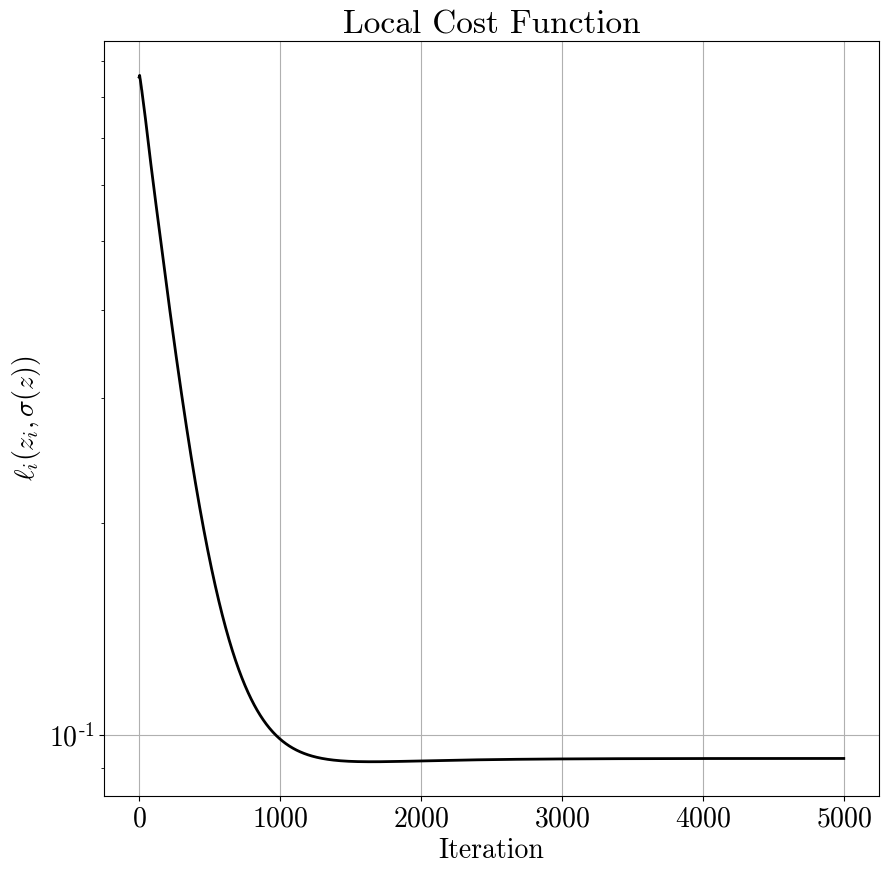

In [40]:
plt.figure(figsize=(10, 10), dpi=100)

plot(df, 'local_cost', sum_over_robots=True, plot_single_robots=False)
plt.ylabel(r'$\ell_i(z_i, \sigma(z))$')
plt.title('Local Cost Function')
# plt.legend()

Text(0, 0.5, '$\\|\\nabla \\ell_i(z_i, \\sigma(z))\\|$')

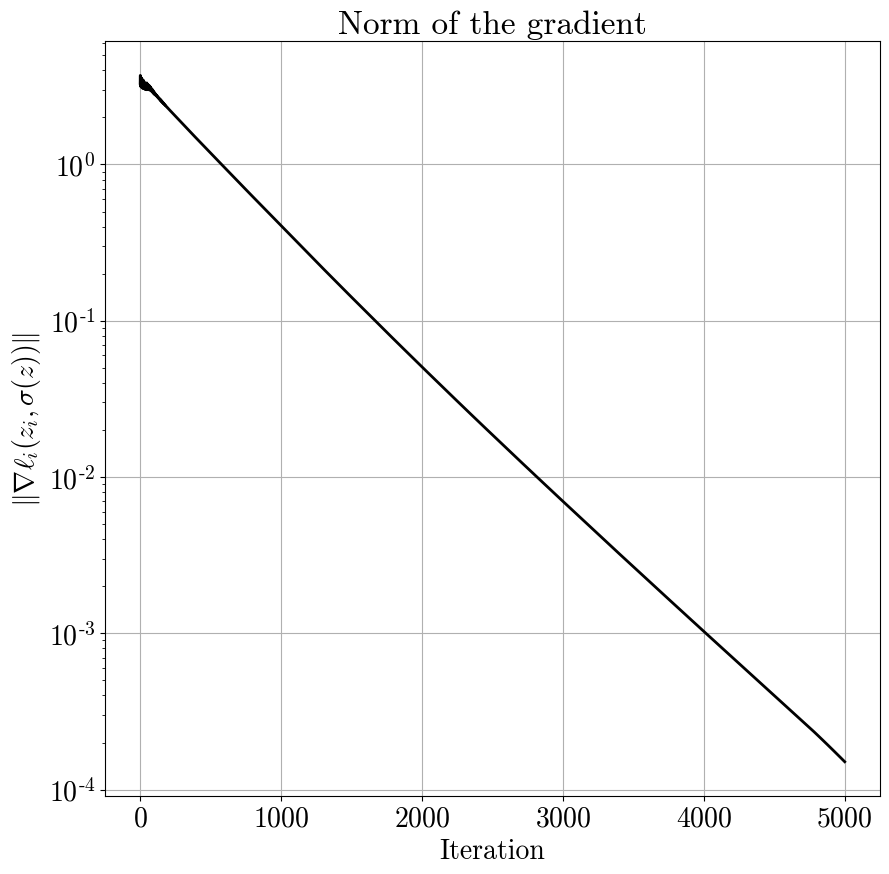

In [41]:
plt.figure(figsize=(10, 10), dpi=100)

plot(df, 'grad_est', sum_over_robots=True, plot_single_robots=False)
# plt.ylabel(r'$\ell_i(z_i, \sigma(z))$')
plt.title('Norm of the gradient')
plt.xlabel('Iteration')
plt.ylabel(r"$\|\nabla \ell_i(z_i, \sigma(z))\|$")
# plt.legend()